# Tensorflow Project Exercise
We'll use the [Bank Authentication Data Set] bank_note_data.csv (https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning!

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('bank_note_data.csv')
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
df.describe()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


<Axes: xlabel='Class', ylabel='count'>

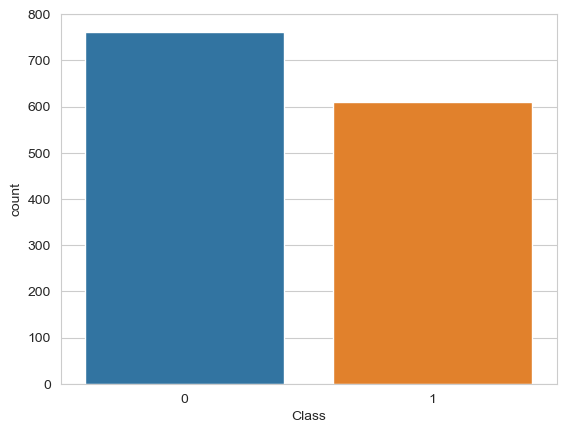

In [8]:
# Classes Countplot (Authentic 1 vs Fake 0)
sns.countplot(x = 'Class', data = df)

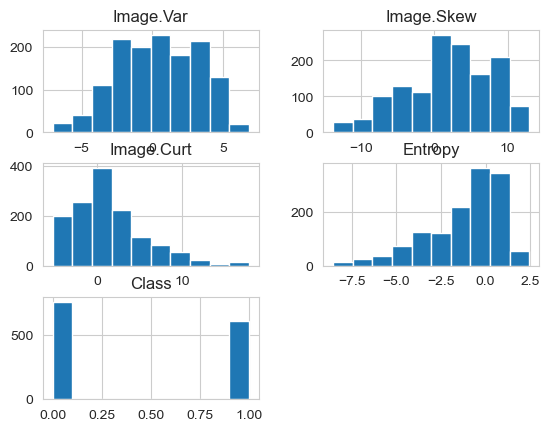

In [9]:
df.hist()
plt.show()

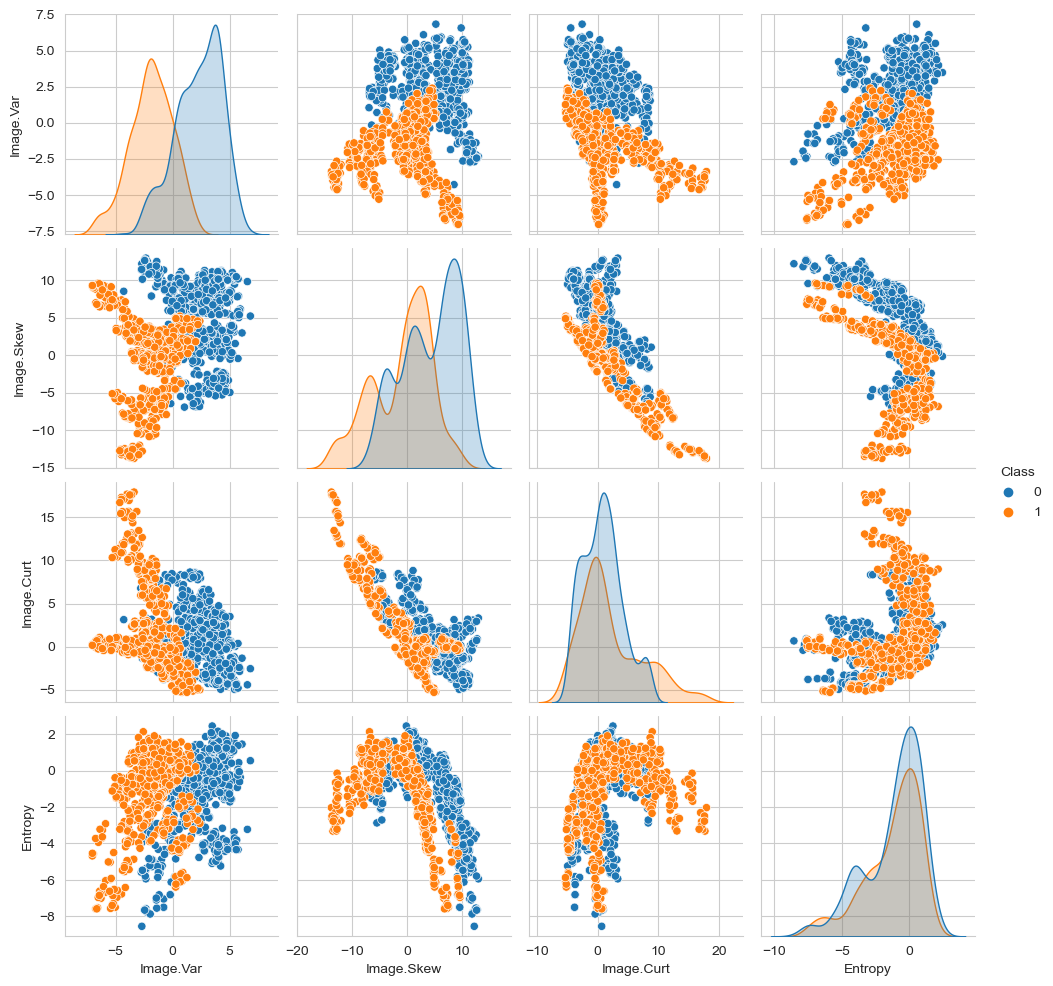

In [10]:
# PairPlot, set Hue to Class
sns.pairplot(data = df, hue = 'Class')

# Data Preparation

In [12]:
# Standard Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X = df.drop('Class', axis = 1))
scaled_data = sc.transform(X = df.drop('Class', axis = 1))
df_scaled = pd.DataFrame(data = scaled_data, columns = df.columns[:-1] ) 
df_scaled.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


# DNN

In [14]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.models import Sequential
from keras.layers import Dense

In [15]:
# Train Test Split
X = df_scaled
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
y_test  = (y_test==1).astype(np.int32)
y_train = (y_train==1).astype(np.int32)

In [16]:
# Sequential model
model = models.Sequential()

# Stack 3 hidden layers and 1 output layer
model.add(Dense(units = 10, activation='relu', input_dim=4))
model.add(Dense(units = 20, activation='relu'))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

# Now compile the method.
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs = 20, batch_size = 100)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5734 - loss: 0.7036
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5722 - loss: 0.6636 
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5705 - loss: 0.6215 
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5763 - loss: 0.5841 
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5667 - loss: 0.5559 
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5937 - loss: 0.5104 
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6844 - loss: 0.4779 
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8006 - loss: 0.4596 
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8859 - loss: 0.4201 
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9174 - loss: 0.4056 
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9345 - loss: 0.3752 
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

# Model predict and evaluation

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob>0.5).astype(int)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [19]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9878 - loss: 0.3007  
Test Loss: 0.30826660990715027
Test Accuracy: 0.987864077091217
[[217   1]
 [  4 190]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       218
           1       0.99      0.98      0.99       194

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [20]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[217   1]
 [  4 190]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       218
           1       0.99      0.98      0.99       194

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



High accurate results. Is it actually correct?!

# LazyPredict

In [ ]:
May nay em thay tren Linkedin

In [23]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [24]:
from lazypredict.Supervised import LazyClassifier

X = df_scaled
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.64it/s]


[LightGBM] [Info] Number of positive: 319, number of negative: 367
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 686, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.465015 -> initscore=-0.140171
[LightGBM] [Info] Start training from score -0.140171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

# Random Forest Model

Just to practice the previous lessons

In [27]:
from sklearn.ensemble import RandomForestClassifier

X = df_scaled
y = df['Class']

rc = RandomForestClassifier()
rc.fit(X_train, y_train)
y_predict = rc.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[392   3]
 [  4 287]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       395
           1       0.99      0.99      0.99       291

    accuracy                           0.99       686
   macro avg       0.99      0.99      0.99       686
weighted avg       0.99      0.99      0.99       686



# KNN

Just to practice the previous lessons

In [30]:
from sklearn.neighbors import KNeighborsClassifier

X = df_scaled
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Finding optimal n_neighbors
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': range(1, 15)
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

Best n_neighbors: 1
Best cross-validation accuracy: 0.9982


In [32]:
# Training model with n_neighbors=2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[148   0]
 [  0 127]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

